# ECE C247 - Neural Networks & Deep Learning, EEG Project
## Alexie Pogue, Amir Omidfar, Eric Peltola, Kenny Chen

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Parameters

In [0]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Data Setup

## Load Data

In [3]:
data_path = "/content/drive/Shared drives/ECE C247 Project/data/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[3], verbose=True)

Training/Valid data shape: (236, 22, 1000)
Test data shape: (50, 22, 1000)


## Preprocessing

In [0]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Dataloaders

In [0]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.39685
	Train loss: 0.04418, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02895, Accuracy: 13/48 (27.08%)
	Test loss: 0.02791, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.32403
	Train loss: 0.04414, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02879, Accuracy: 13/48 (27.08%)
	Test loss: 0.02724, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.34739
	Train loss: 0.04364, Accuracy: 48/188 (25.53%)
	Validation loss: 0.02858, Accuracy: 11/48 (22.92%)
	Test loss: 0.02694, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.34180
	Train loss: 0.04352, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02874, Accuracy: 13/48 (27.08%)
	Test loss: 0.02655, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.36722
	Train loss: 0.04361, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02888, Accuracy: 13/48 (27.08%)
	Test loss: 0.026

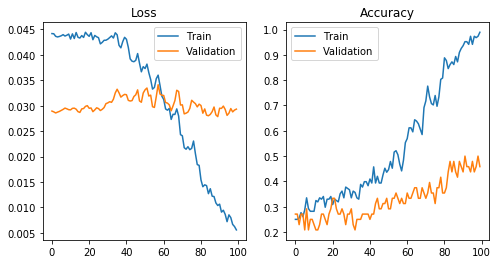

In [6]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.56437
	Train loss: 0.04442, Accuracy: 42/188 (22.34%)
	Validation loss: 0.02879, Accuracy: 15/48 (31.25%)
	Test loss: 0.02791, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.41839
	Train loss: 0.04457, Accuracy: 42/188 (22.34%)
	Validation loss: 0.02866, Accuracy: 15/48 (31.25%)
	Test loss: 0.02802, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.44261
	Train loss: 0.04465, Accuracy: 42/188 (22.34%)
	Validation loss: 0.02862, Accuracy: 15/48 (31.25%)
	Test loss: 0.02793, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.31560
	Train loss: 0.04423, Accuracy: 44/188 (23.40%)
	Validation loss: 0.02871, Accuracy: 15/48 (31.25%)
	Test loss: 0.02792, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.44636
	Train loss: 0.04364, Accuracy: 56/188 (29.79%)
	Validation loss: 0.02874, Accuracy: 16/48 (33.33%)
	Test loss: 0.027

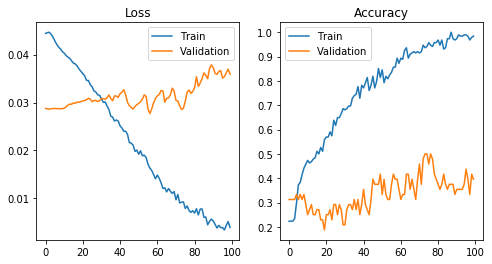

In [7]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## GRU

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.46010
	Train loss: 0.04410, Accuracy: 57/188 (30.32%)
	Validation loss: 0.02899, Accuracy: 8/48 (16.67%)
	Test loss: 0.02793, Accuracy: 9/50 (18.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.33120
	Train loss: 0.04396, Accuracy: 58/188 (30.85%)
	Validation loss: 0.02907, Accuracy: 10/48 (20.83%)
	Test loss: 0.02817, Accuracy: 9/50 (18.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.27406
	Train loss: 0.04322, Accuracy: 65/188 (34.57%)
	Validation loss: 0.02926, Accuracy: 11/48 (22.92%)
	Test loss: 0.02837, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.23454
	Train loss: 0.04252, Accuracy: 67/188 (35.64%)
	Validation loss: 0.02924, Accuracy: 14/48 (29.17%)
	Test loss: 0.02854, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.27142
	Train loss: 0.04154, Accuracy: 67/188 (35.64%)
	Validation loss: 0.02928, Accuracy: 15/48 (31.25%)
	Test loss: 0.02874,

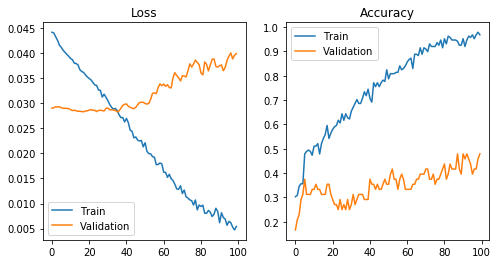

In [8]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + LSTM

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.38707
	Train loss: 0.04435, Accuracy: 42/188 (22.34%)
	Validation loss: 0.02873, Accuracy: 15/48 (31.25%)
	Test loss: 0.02778, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.38130
	Train loss: 0.04430, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02877, Accuracy: 13/48 (27.08%)
	Test loss: 0.02781, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.38043
	Train loss: 0.04425, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02881, Accuracy: 13/48 (27.08%)
	Test loss: 0.02783, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.37712
	Train loss: 0.04421, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02885, Accuracy: 13/48 (27.08%)
	Test loss: 0.02786, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.37454
	Train loss: 0.04417, Accuracy: 54/188 (28.72%)
	Validation loss: 0.02889, Accuracy: 11/48 (22.92%)
	Test loss: 0.027

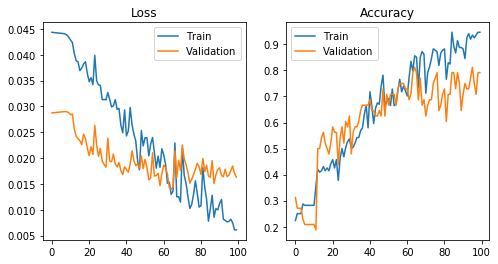

In [9]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN + GRU

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.40079
	Train loss: 0.04426, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02881, Accuracy: 13/48 (27.08%)
	Test loss: 0.02771, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.37576
	Train loss: 0.04401, Accuracy: 56/188 (29.79%)
	Validation loss: 0.02879, Accuracy: 15/48 (31.25%)
	Test loss: 0.02767, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.36261
	Train loss: 0.04352, Accuracy: 63/188 (33.51%)
	Validation loss: 0.02856, Accuracy: 12/48 (25.00%)
	Test loss: 0.02741, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.34356
	Train loss: 0.04266, Accuracy: 66/188 (35.11%)
	Validation loss: 0.02794, Accuracy: 13/48 (27.08%)
	Test loss: 0.02677, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.33835
	Train loss: 0.04135, Accuracy: 72/188 (38.30%)
	Validation loss: 0.02689, Accuracy: 15/48 (31.25%)
	Test loss: 0.025

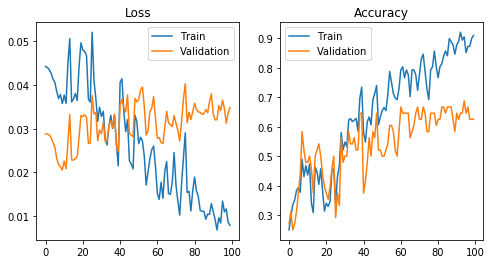

In [10]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)